# Analise de dados sobre vendas de jogos e plataformas  

##  1.1Bibliotecas

In [3]:
import pandas as pd
import numpy as np



##            1.2 Leituras dos dados

In [5]:

games_data = pd.read_csv('../datasets/games.csv')  # 
# lendo os dados
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##       1.3 Correcao dos Dados  

In [6]:
print(games_data.dtypes)


Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


In [7]:
games_data.columns = games_data.columns.str.lower() #editando as strings com letra miniuscula 
games_data['year_of_release'] = pd.to_datetime(games_data['year_of_release'], format='%Y', errors='coerce') #



* corrigindo data para - datetime 
*passando as str para o minusculos para melhor edicao 

In [8]:
print(games_data.isnull().sum()) #checando dados ausentes 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [9]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


* year_of_release - datetime corrigido 
*varios dados faltantes , Colunas como critic_score, user_score, e rating têm muitos valores ausentes, o que pode impactar análises específicas.


In [10]:
games_data = games_data.dropna(subset=['name'])
games_data = games_data.dropna(subset=['year_of_release'])
games_data = games_data.dropna(subset=['genre'])
games_data['user_score'] = games_data['user_score'].replace('tbd', np.nan).astype(float)


In [11]:
games_data.groupby(['name','platform'])['year_of_release'].transform(
    lambda x: x.fillna(x.mean()))


0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16710   2016-01-01
16711   2006-01-01
16712   2016-01-01
16713   2003-01-01
16714   2016-01-01
Name: year_of_release, Length: 16444, dtype: datetime64[ns]

*juntando os anos dos jogos em outras plataformas


In [12]:
games_data.groupby(['genre', 'platform'])['critic_score'].transform(
    lambda x: x.fillna(x.mean()))


0        76.000000
1              NaN
2        82.000000
3        80.000000
4              NaN
           ...    
16710    69.012766
16711    69.758170
16712    71.400000
16713    67.807692
16714          NaN
Name: critic_score, Length: 16444, dtype: float64

* juntando as criticas dos jogos em outras plataformas 

In [13]:
games_data.groupby(['genre', 'platform'])['user_score'].transform(
    lambda x: x.fillna(x.mean()))


0        8.000000
1             NaN
2        8.300000
3        8.000000
4             NaN
           ...   
16710    6.901550
16711    6.291463
16712    7.775000
16713    7.686000
16714         NaN
Name: user_score, Length: 16444, dtype: float64

*Preenchendo os users.score de acordo com outras plataformas 

In [14]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


* Confirmacao das correcoes dos dados 

In [15]:
# Calcular o total de vendas somando as vendas de todas as regiões
games_data['total_sales'] = (
    games_data['na_sales'] + 
    games_data['eu_sales'] + 
    games_data['jp_sales'] + 
    games_data['other_sales']
)

print(games_data[['name', 'total_sales']].head())


                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


* Aqui vemos o total de games vendidos em todzs as regioes 

##                 2. Analise os dados

###  2.1 jogos lancados por ano 

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64


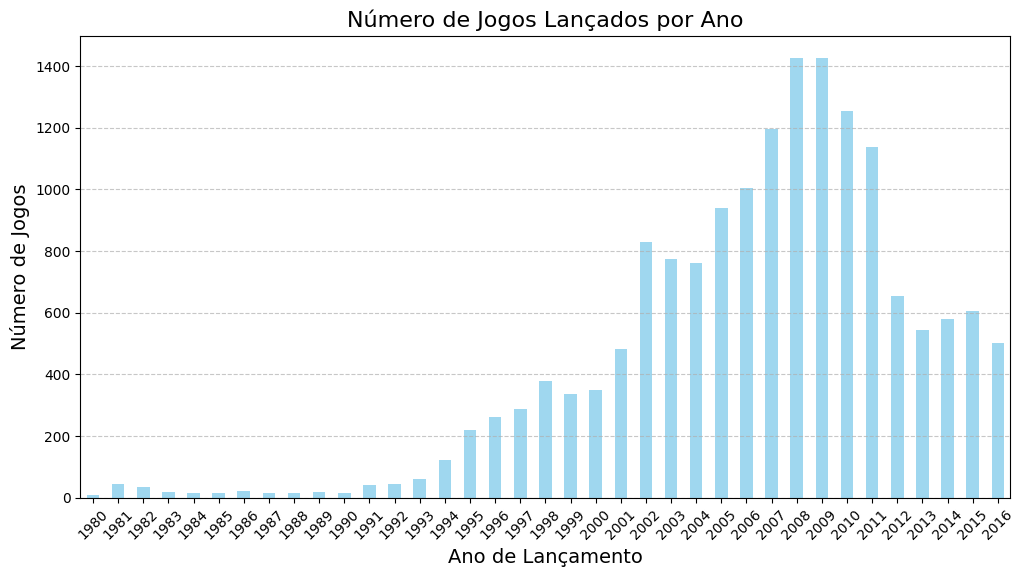

In [16]:


import matplotlib.pyplot as plt

# Contar o número de jogos por ano
games_per_year = games_data['year_of_release'].dt.year.value_counts().sort_index()

# Exibir a tabela com os números
print(games_per_year)

# Plotar a distribuição
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Número de Jogos Lançados por Ano', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Número de Jogos', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* 2008 e 2009 foi os anos de maiores lancamentos 
* de 2007 a 2011 , foi a epoca de ouro dos games tendo uma crescente de lancamentos 
* porem em 2012 teve uma queda nos lancamentos 

## 2.2 Análise de Vendas por Plataforma

Plataformas mais populares (vendas totais):
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64


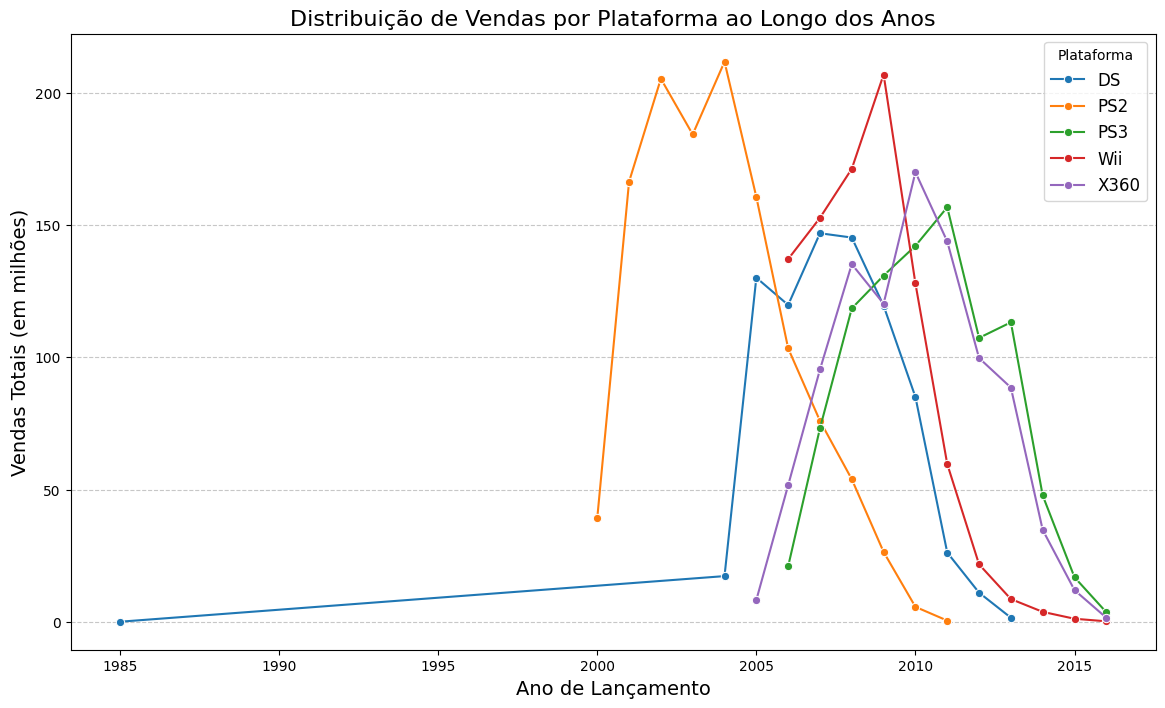

In [17]:

import seaborn as sns

# Calcular vendas totais por plataforma
platform_sales = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


# Selecionar as 5 plataformas com maiores vendas totais
top_platforms = platform_sales.head(5).index
print("Plataformas mais populares (vendas totais):")
print(platform_sales.head(5))


# Filtrar o DataFrame apenas para as plataformas mais populares
filtered_data = games_data[games_data['platform'].isin(top_platforms)]

# Calcular a distribuição de vendas por ano para cada plataforma
platform_year_sales = filtered_data.groupby(['platform', games_data['year_of_release'].dt.year])['total_sales'].sum().reset_index()

# Plotar a distribuição de vendas por plataforma ao longo dos anos
plt.figure(figsize=(14, 8))
sns.lineplot(data=platform_year_sales, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Distribuição de Vendas por Plataforma ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Vendas Totais (em milhões)', fontsize=14)
plt.legend(title='Plataforma', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* interessante considerar os dados a partir do ano 2000 en diante 
* a plataforma ps2 foia que teve os maiores indices de lancamentos , caindo semente com o lancamento do ps3
* Você verá quais plataformas dominaram as vendas e durante quais períodos.


In [18]:
# Identificar o último ano de vendas para cada plataforma
last_sales_year = games_data.groupby('platform')['year_of_release'].max().dt.year

# Identificar plataformas populares que não têm vendas recentes (ex.: antes de 2016)
obsolete_platforms = last_sales_year[last_sales_year < 2016]
print("\nPlataformas que não têm vendas recentes:")
print(obsolete_platforms)



Plataformas que não têm vendas recentes:
platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: int32


* Aqui podemps ver o ultimo ano de lancamentos das plataformas

In [19]:
# Calcular o primeiro e o último ano de vendas para cada plataforma
platform_lifespan = games_data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = (platform_lifespan['max'] - platform_lifespan['min']).dt.days / 365

print("\nVida útil das plataformas (em anos):")
print(platform_lifespan.sort_values('lifespan', ascending=False))



Vida útil das plataformas (em anos):
                min        max   lifespan
platform                                 
PC       1985-01-01 2016-01-01  31.019178
DS       1985-01-01 2013-01-01  28.019178
GB       1988-01-01 2001-01-01  13.010959
NES      1983-01-01 1994-01-01  11.008219
PS2      2000-01-01 2011-01-01  11.008219
PSP      2004-01-01 2015-01-01  11.008219
X360     2005-01-01 2016-01-01  11.005479
PS3      2006-01-01 2016-01-01  10.005479
DC       1998-01-01 2008-01-01  10.005479
Wii      2006-01-01 2016-01-01  10.005479
2600     1980-01-01 1989-01-01   9.008219
SNES     1990-01-01 1999-01-01   9.005479
PS       1994-01-01 2003-01-01   9.005479
XB       2000-01-01 2008-01-01   8.005479
GBA      2000-01-01 2007-01-01   7.005479
N64      1996-01-01 2002-01-01   6.005479
GC       2001-01-01 2007-01-01   6.002740
PSV      2011-01-01 2016-01-01   5.002740
SAT      1994-01-01 1999-01-01   5.002740
3DS      2011-01-01 2016-01-01   5.002740
GEN      1990-01-01 1994-01-01   4.002

* aqui observamos a vida util das plataformas , com o pc com mais tempo de uso 

## 2.3 diagrama  para vendas globais de jogos divididos por plataformas

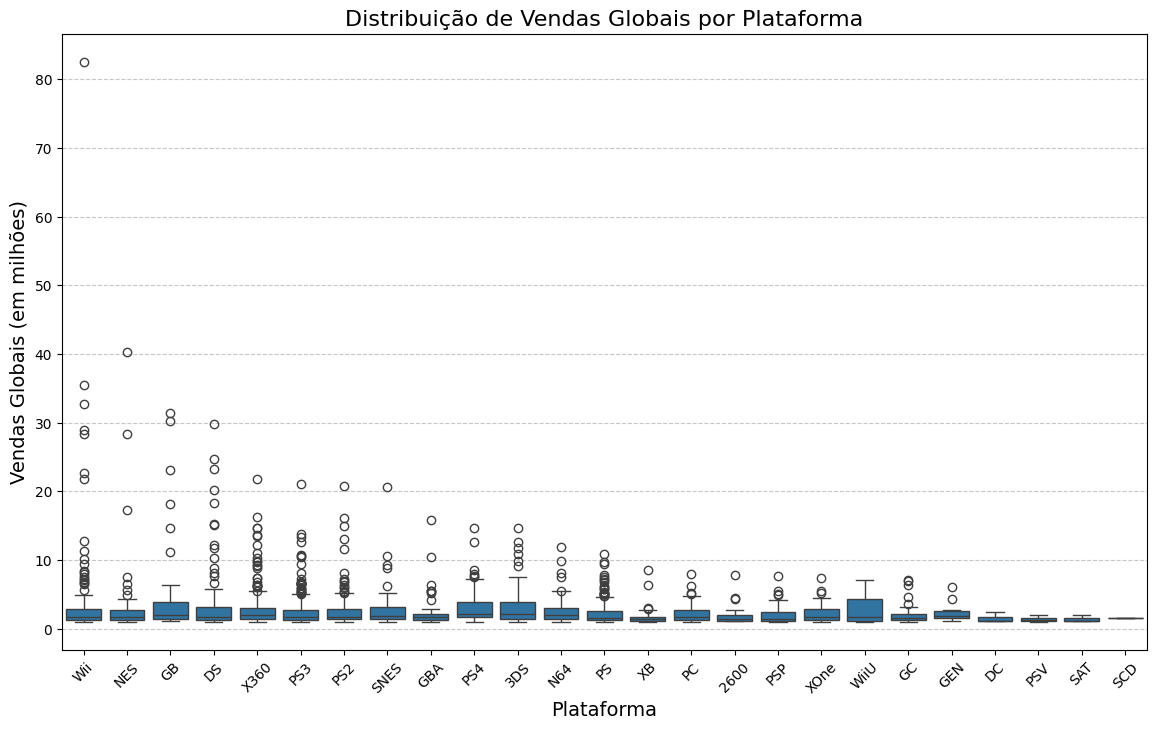

In [25]:
# Filtrar dados para plataformas com vendas significativas
platform_sales_threshold = 1  # Limite mínimo de vendas globais para incluir no gráfico
filtered_platform_data = games_data[games_data['total_sales'] > platform_sales_threshold]

# Criar o boxplot para vendas globais por plataforma
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_platform_data, x='platform', y='total_sales')
plt.title('Distribuição de Vendas Globais por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Vendas Globais (em milhões)', fontsize=14)
plt.xticks(rotation=45),
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* A presença de outliers pode refletir sucessos pontuais (por exemplo, franquias populares).
* jogos da marca nintendo (wiiu , 3ds, gb ) sao lideres de vendas globais , com vendas consistentes 


##    2.4 Relacao usuarios e avalioacoes em relacao as vendas

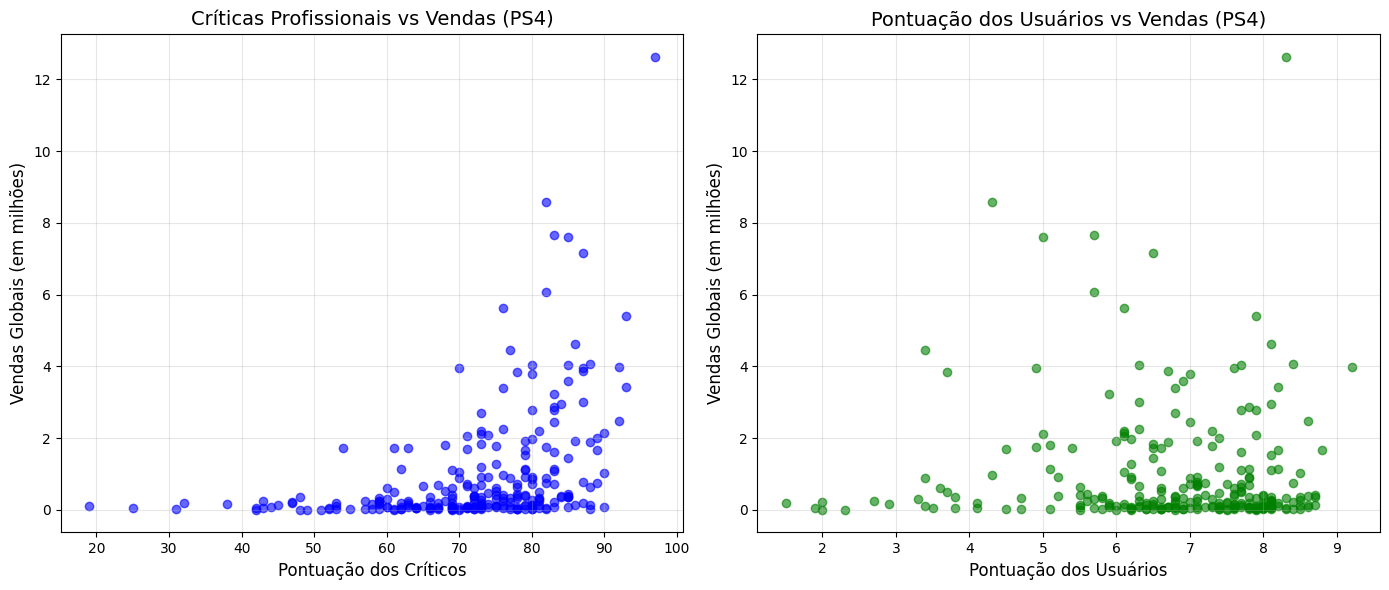

Correlação entre críticas profissionais e vendas: 0.41
Correlação entre pontuação dos usuários e vendas: -0.03


In [30]:
# Filtrar os dados para a plataforma PS4
ps4_data = games_data[games_data['platform'] == 'PS4']

# Converter a coluna 'user_score' para numérica (caso contenha valores inválidos como "tbd")
ps4_data = ps4_data.copy()
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')

# Remover linhas com valores ausentes em 'user_score', 'critic_score' ou 'total_sales'
ps4_data_clean = ps4_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Gráfico de dispersão: Avaliação dos críticos x Vendas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(ps4_data_clean['critic_score'], ps4_data_clean['total_sales'], alpha=0.6, color='blue')
plt.title('Críticas Profissionais vs Vendas (PS4)', fontsize=14)
plt.xlabel('Pontuação dos Críticos', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.grid(alpha=0.3)

# Gráfico de dispersão: Avaliação dos usuários x Vendas
plt.subplot(1, 2, 2)
plt.scatter(ps4_data_clean['user_score'], ps4_data_clean['total_sales'], alpha=0.6, color='green')
plt.title('Pontuação dos Usuários vs Vendas (PS4)', fontsize=14)
plt.xlabel('Pontuação dos Usuários', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular correlação entre pontuação e vendas
critic_corr = ps4_data_clean['critic_score'].corr(ps4_data_clean['total_sales'])
user_corr = ps4_data_clean['user_score'].corr(ps4_data_clean['total_sales'])

print(f"Correlação entre críticas profissionais e vendas: {critic_corr:.2f}")
print(f"Correlação entre pontuação dos usuários e vendas: {user_corr:.2f}")


* Correlação entre críticas profissionais e vendas (0.41):
correlacao moderada positiva, Sugere que jogos com melhores avaliações de críticos tendem a ter vendas globais mais altas, mas a relação não é extremamente forte. 

* Correlação entre pontuação dos usuários e vendas (-0.03):
este valor indica quase nenhuma correlacao entra avaliacoes de usuarios e as vendas





Conclusão:
* As críticas profissionais têm um papel mais significativo nas vendas do que as avaliações de usuários, mas nem sempre são determinantes.
* Para estratégias de marketing, pode ser mais eficaz focar na conquista de boas críticas profissionais e usar campanhas de pré-lançamento para maximizar o impacto.


##            2.4 distribuição de jogos por gênero

           genre  total_sales  num_games  avg_sales_per_game
0         Action      1716.52       3307            0.519057
1         Sports      1309.67       2306            0.567940
2        Shooter      1041.36       1296            0.803519
3   Role-Playing       931.08       1481            0.628683
4       Platform       825.55        878            0.940262
5           Misc       790.29       1721            0.459204
6         Racing       723.49       1226            0.590122
7       Fighting       442.66        837            0.528865
8     Simulation       387.96        857            0.452695
9         Puzzle       239.89        569            0.421599
10     Adventure       233.33       1293            0.180456
11      Strategy       172.57        673            0.256419


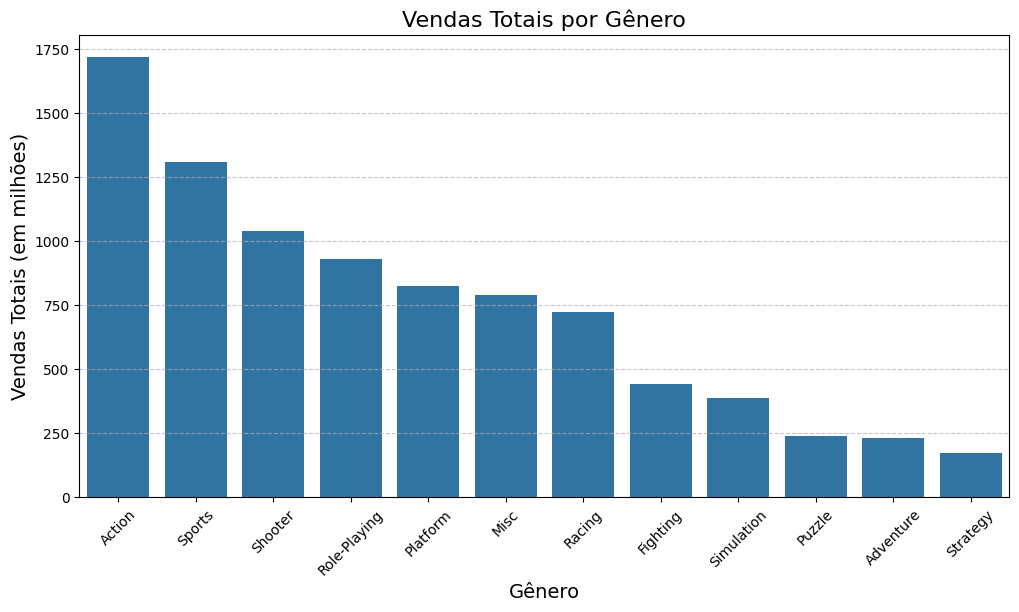

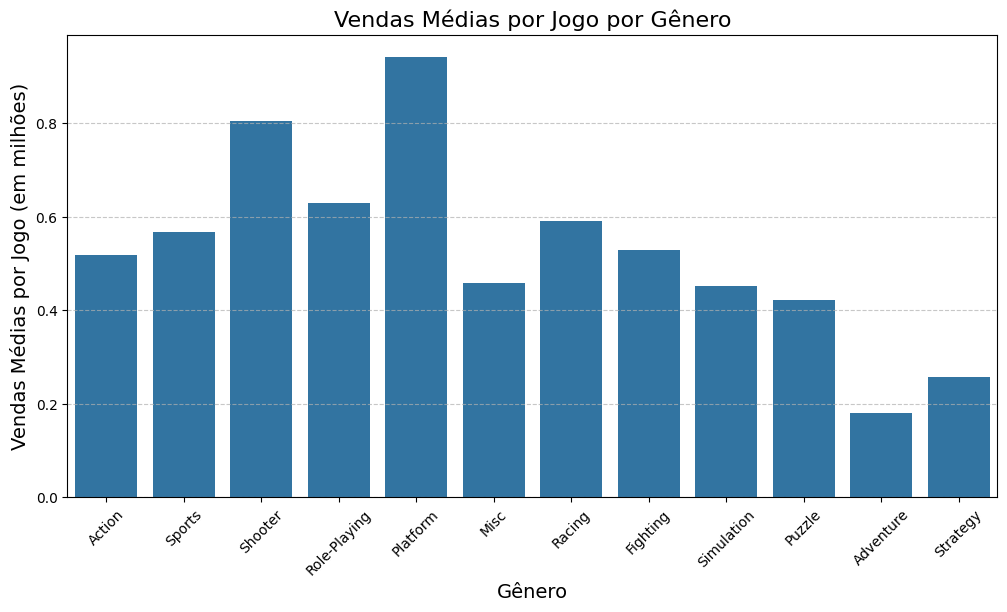

In [28]:
# Agrupar dados por gênero e calcular vendas totais e número de jogos por gênero
genre_sales = games_data.groupby('genre').agg(
    total_sales=('total_sales', 'sum'),
    num_games=('name', 'count')
).sort_values(by='total_sales', ascending=False).reset_index()

# Adicionar uma coluna com vendas médias por jogo
genre_sales['avg_sales_per_game'] = genre_sales['total_sales'] / genre_sales['num_games']

# Exibir tabela resumida
print(genre_sales)

# Visualizar vendas totais por gênero
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales')
plt.title('Vendas Totais por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Vendas Totais (em milhões)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualizar vendas médias por jogo por gênero
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='avg_sales_per_game')
plt.title('Vendas Médias por Jogo por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Vendas Médias por Jogo (em milhões)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Conclusões:

* Gêneros como Action, Shooter e Sports geralmente lideram em vendas totais devido ao grande número de jogos e apelo popular.
* Gêneros como Shooter e Role-Playing frequentemente têm vendas médias altas, indicando que jogos nesses gêneros têm maior chance de serem sucessos individuais.
* Gêneros como Puzzle e Adventure geralmente têm vendas mais baixas, tanto no total quanto na média, indicando que são mais de nicho ou têm menos sucesso comercial.
* Gêneros que envolvem ação intensa ou competição (ex.: Shooter, Sports) tendem a atrair públicos maiores e geram mais receita.



##            3. dados por regioes 

In [31]:
# Função para calcular os cinco principais valores em cada região
def top_values_by_region(data, column, region_sales):
    return data.groupby(column).agg(total_sales=(region_sales, 'sum')).sort_values(by='total_sales', ascending=False).head(5).reset_index()


In [32]:
# Perfis de plataformas por região
na_top_platforms = top_values_by_region(games_data, 'platform', 'na_sales')
eu_top_platforms = top_values_by_region(games_data, 'platform', 'eu_sales')
jp_top_platforms = top_values_by_region(games_data, 'platform', 'jp_sales')


# Exibir resultados
print("Top 5 plataformas na América do Norte:")
print(na_top_platforms)
print("\nTop 5 plataformas na Europa:")
print(eu_top_platforms)
print("\nTop 5 plataformas no Japão:")
print(jp_top_platforms)


Top 5 plataformas na América do Norte:
  platform  total_sales
0     X360       595.74
1      PS2       572.92
2      Wii       486.87
3      PS3       390.13
4       DS       380.31

Top 5 plataformas na Europa:
  platform  total_sales
0      PS2       332.63
1      PS3       327.21
2     X360       268.32
3      Wii       258.32
4       PS       212.39

Top 5 plataformas no Japão:
  platform  total_sales
0       DS       175.02
1       PS       139.78
2      PS2       137.54
3     SNES       116.55
4      3DS       100.62


Conclusoes:

* America do norte: xbox lidera  como a plataforma mais vendida 
* europa: consoles da marca playstation lidera as vendas 
* japao: As plataformas mais populares frequentemente incluem Nintendo DS, 3DS, e PlayStation consoles , Consoles portáteis têm grande aceitação devido a fatores culturais e de estilo de vida.



In [33]:
# Perfis de gêneros por região
na_top_genres = top_values_by_region(games_data, 'genre', 'na_sales')
eu_top_genres = top_values_by_region(games_data, 'genre', 'eu_sales')
jp_top_genres = top_values_by_region(games_data, 'genre', 'jp_sales')

# Exibir resultados

print("\nTop 5 gêneros na América do Norte:")
print(na_top_genres)
print("\nTop 5 gêneros na Europa:")
print(eu_top_genres)
print("\nTop 5 gêneros no Japão:")
print(jp_top_genres)



Top 5 gêneros na América do Norte:
      genre  total_sales
0    Action       863.17
1    Sports       671.20
2   Shooter       584.83
3  Platform       444.44
4      Misc       399.57

Top 5 gêneros na Europa:
     genre  total_sales
0   Action       510.99
1   Sports       371.33
2  Shooter       314.52
3   Racing       234.49
4     Misc       210.60

Top 5 gêneros no Japão:
          genre  total_sales
0  Role-Playing       353.39
1        Action       160.14
2        Sports       134.93
3      Platform       130.71
4          Misc       107.02


Conclusoes:
* América do Norte e Europa:Gêneros como Shooter, Action, e Sports são consistentemente populares.
Esses gêneros atraem públicos maiores devido à competição e apelo universal.

* Japao: Role-Playing (RPG) é frequentemente dominante, refletindo o gosto local por jogos narrativos e imersivos.



In [34]:
# Perfis de classificações ESRB por região
na_top_ratings = top_values_by_region(games_data, 'rating', 'na_sales')
eu_top_ratings = top_values_by_region(games_data, 'rating', 'eu_sales')
jp_top_ratings = top_values_by_region(games_data, 'rating', 'jp_sales')

# Exibir resultados

print("\nClassificações ESRB mais populares na América do Norte:")
print(na_top_ratings)
print("\nClassificações ESRB mais populares na Europa:")
print(eu_top_ratings)
print("\nClassificações ESRB mais populares no Japão:")
print(jp_top_ratings)




Classificações ESRB mais populares na América do Norte:
  rating  total_sales
0      E      1274.24
1      T       747.60
2      M       742.89
3   E10+       345.50
4    K-A         2.56

Classificações ESRB mais populares na Europa:
  rating  total_sales
0      E       703.87
1      M       480.00
2      T       421.79
3   E10+       183.35
4     AO         0.61

Classificações ESRB mais populares no Japão:
  rating  total_sales
0      E       197.96
1      T       150.70
2      M        63.58
3   E10+        40.20
4    K-A         1.46


Conclusoes:

* América do Norte e Europa: Jogos classificados como E (Everyone) ou T (Teen) têm vendas mais altas, já que são acessíveis para públicos amplos.
Classificações M (Mature) também têm um bom desempenho devido ao apelo de jogos mais intensos.

* Japao: As classificações ESRB têm menor impacto, pois outras classificações regionais são mais relevantes. Jogos M têm boa aceitação em mercados ocidentais, mas têm menor impacto no Japão.




##   4. Teste de hipoteses


#### Critério de Teste:
* Usaremos o teste t de Student para médias independentes, pois queremos comparar as médias de duas populações diferentes.
* Nível de significância (α): 0.05 .


##            4.1. Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC 

In [35]:

from scipy.stats import ttest_ind

# Filtrar dados relevantes para Xbox One e PC
xbox_one_ratings = games_data[(games_data['platform'] == 'XOne') & (games_data['user_score'].notna())]['user_score'].astype(float)
pc_ratings = games_data[(games_data['platform'] == 'PC') & (games_data['user_score'].notna())]['user_score'].astype(float)

# Teste t para Xbox One e PC
t_stat_xbox_pc, p_value_xbox_pc = ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Exibir resultados
print("Teste de Hipótese 1: Xbox One vs PC")
print(f"T-Statistic: {t_stat_xbox_pc}, P-Value: {p_value_xbox_pc}")
if p_value_xbox_pc < 0.05:
    print("Rejeitamos a hipótese nula: As médias das avaliações de Xbox One e PC são diferentes.\n")
else:
    print("Falhamos em rejeitar a hipótese nula: As médias das avaliações de Xbox One e PC são iguais.\n")


Teste de Hipótese 1: Xbox One vs PC
T-Statistic: -4.671113961085972, P-Value: 4.5385802963771835e-06
Rejeitamos a hipótese nula: As médias das avaliações de Xbox One e PC são diferentes.



##            4.2 - Hipótese 2: As classificações médias de usuários para os gêneros Action e Sports 

In [36]:
# Filtrar dados relevantes para Action e Sports
action_ratings = games_data[(games_data['genre'] == 'Action') & (games_data['user_score'].notna())]['user_score'].astype(float)
sports_ratings = games_data[(games_data['genre'] == 'Sports') & (games_data['user_score'].notna())]['user_score'].astype(float)

# Teste t para Action e Sports
t_stat_action_sports, p_value_action_sports = ttest_ind(action_ratings, sports_ratings, equal_var=False)

print("Teste de Hipótese 2: Action vs Sports")
print(f"T-Statistic: {t_stat_action_sports}, P-Value: {p_value_action_sports}")
if p_value_action_sports < 0.05:
    print("Rejeitamos a hipótese nula: As médias das avaliações de Action e Sports são diferentes.\n")
else:
    print("Falhamos em rejeitar a hipótese nula: As médias das avaliações de Action e Sports são iguais.\n")


Teste de Hipótese 2: Action vs Sports
T-Statistic: 1.789373351094851, P-Value: 0.07370217419278526
Falhamos em rejeitar a hipótese nula: As médias das avaliações de Action e Sports são iguais.



####                        conclusão geral:
* 1. Hipótese 1: Xbox One vs PC

Como o P-value é menor que 0.05, rejeitamos a hipótese nula .
Isso indica que as médias das avaliações dos usuários para as plataformas Xbox One e PC são estatisticamente diferentes.
Essa diferença pode ser relevante para decisões de marketing ou planejamento estratégico para essas plataformas, já que os usuários das duas têm percepções diferentes.

* Estratégias de marketing podem precisar ser ajustadas para cada plataforma, já que as avaliações dos usuários são diferentes

* 2. Hipótese 2: Action vs Sports

Como o P-value é maior que 0.05, falhamos em rejeitar a hipótese nula.
Isso sugere que não há evidências estatísticas suficientes para afirmar que as médias das avaliações dos usuários para os gêneros Action e Sports são diferentes.
Em outras palavras, os usuários parecem avaliar os jogos desses dois gêneros de maneira semelhante.


#             Conclusao geral da analise  

####                            Principais Descobertas:

1. Tendências de Lançamento de Jogos:

* O número de jogos lançados atingiu seu pico entre 2008 e 2009, seguido por uma queda consistente até 2016. Isso reflete mudanças na indústria, como o aumento de jogos digitais e a consolidação do mercado.

2. Plataformas Mais Lucrativas:

* As plataformas com as maiores vendas totais foram PS2, X360, e PS3. No entanto, plataformas como PS4 e XOne mostraram potencial de crescimento em 2016, indicando que são promissoras para 2017.
* Algumas plataformas, como PS2 e Wii, perderam relevância nos últimos anos, evidenciando o ciclo de vida típico de plataformas na indústria.

3. Impacto de Gêneros no Sucesso:

* Os gêneros Action e Shooter foram os mais lucrativos, enquanto gêneros como Puzzle e Adventure tiveram vendas relativamente baixas.
* Jogos de ação e tiro frequentemente atraem um público maior devido à sua popularidade e apelo universal.

4. Perfis Regionais de Usuários:

* América do Norte (AN) e Europa (UE) apresentaram semelhanças em suas plataformas e gêneros preferidos, com destaque para PS4, XOne, e gêneros como Action e Shooter.
* No Japão (JP), plataformas como 3DS e gêneros como RPG dominam o mercado, refletindo preferências culturais distintas.

5. Impacto de Avaliações em Vendas:

* Críticas profissionais apresentaram uma correlação moderada (r=0.41) com as vendas globais, indicando que boas avaliações podem aumentar as vendas.

* Avaliações de usuários não tiveram um impacto significativo (r=−0.03), sugerindo que outros fatores, como marketing e franquias, podem ser mais importantes.

6. Análise de Hipóteses:

* As avaliações dos usuários para as plataformas Xbox One e PC foram estatisticamente diferentes, indicando diferenças significativas entre os públicos dessas plataformas.
* As avaliações médias de usuários para os gêneros Action e Sports não apresentaram diferenças estatisticamente significativas, sugerindo que os jogadores avaliam esses gêneros de maneira similar.


#           Conclusão Final:



####                        A análise revelou padrões importantes sobre o mercado de jogos de videogame, incluindo preferências regionais, gêneros populares, e o impacto de avaliações críticas. As descobertas podem guiar estratégias de marketing mais eficazes e ajudar a prever o sucesso de novos lançamentos. À medida que o mercado evolui, é essencial continuar monitorando essas tendências para manter a competitividade na indústria.


